In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))

In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [5]:
from sklearn.model_selection import train_test_split # 훈련세트와 테스트 테스트를 적절하게 섞어서 만들어 주는 함수

In [6]:
train_input, test_input, train_target, test_target =  train_test_split(fish_data, fish_target,stratify=fish_target)

In [7]:
print(test_target)

[1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]


In [8]:
# 학습
from sklearn.neighbors import KNeighborsClassifier

In [9]:
kn = KNeighborsClassifier()

In [10]:
# 훈련 fit
kn.fit(train_input, train_target) # 지도 학습

KNeighborsClassifier()

In [11]:
# 정확도 확인 - 테스트 세트
kn.score(test_input, test_target)*100

100.0

In [12]:
# 도미 - 길이 25 , 무게 150
kn.predict([[25,150]])

array([0.])

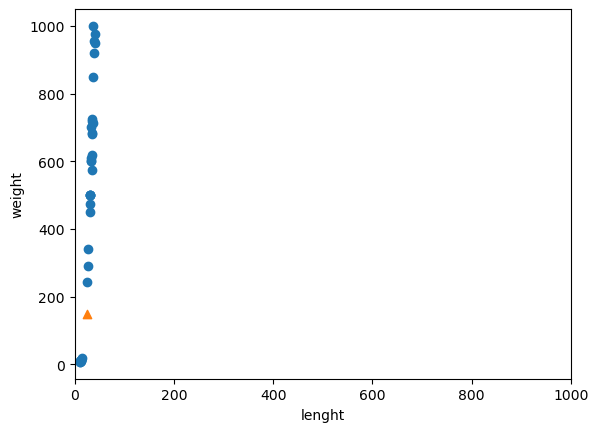

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlim((0, 1000))
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [14]:
# 측정 수치 [25, 150] 최근접 이웃 5개 kneighbors
distances, indexes = kn.kneighbors([[25,150]])

In [15]:
# print(indexes)
train_target[indexes]

array([[1., 0., 0., 0., 1.]])

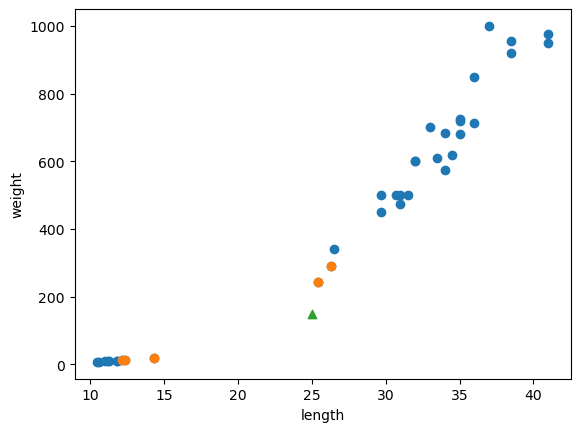

In [16]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [17]:
# 편균
mean = np.mean(train_input,axis=0)

# 표준 편차
std = np.std(train_input,axis=0)

In [18]:
# 표준 점수로 훈련 세트 전처리
train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.93585537  1.60549826]
 [-0.08331297 -0.37964121]
 [ 0.40200529  0.10160472]
 [-1.55868046 -1.37612107]
 [ 0.22729072  0.10160472]
 [-0.19008298 -0.67440435]
 [-1.51014863 -1.37221095]
 [ 1.08145084  1.47014784]
 [-1.45191044 -1.36198447]
 [-1.26748951 -1.34303541]
 [ 0.74172807  0.76331788]
 [ 1.32410997  1.53030358]
 [ 0.83879172  0.74527115]
 [ 0.74172807  0.64300639]
 [ 1.08145084  1.36487529]
 [-1.63633138 -1.37973042]
 [ 0.64466441  0.65804533]
 [-1.58779956 -1.37311328]
 [-0.1027257  -0.53003057]
 [ 0.45053711  0.40238343]
 [ 0.32435437  0.10160472]
 [ 0.74172807  0.77835681]
 [ 0.35347346  0.10160472]
 [ 0.22729072 -0.04878464]
 [ 0.69319624  0.46253917]
 [-1.62662502 -1.38123431]
 [-1.56838683 -1.37281251]
 [-1.47132317 -1.36559382]
 [ 0.59613259  0.4324613 ]
 [ 0.54760076  0.70316213]
 [ 0.83879172  1.1543302 ]
 [ 0.35347346  0.02641004]
 [ 0.64466441  0.32718875]
 [ 0.45053711  0.40238343]
 [-1.51014863 -1.37251173]
 [ 1.32410997  1.4551089 ]]


In [19]:
new = (np.array([25,150])-mean) / std
print(new)

[-0.22890844 -0.95112076]


In [20]:
test_scaled=(test_input-mean) / std

In [21]:
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

In [22]:
kn.predict([new])

array([1.])

In [23]:
distances, indexes = kn.kneighbors([new])
print(indexes)

[[ 5 18  1 23  9]]


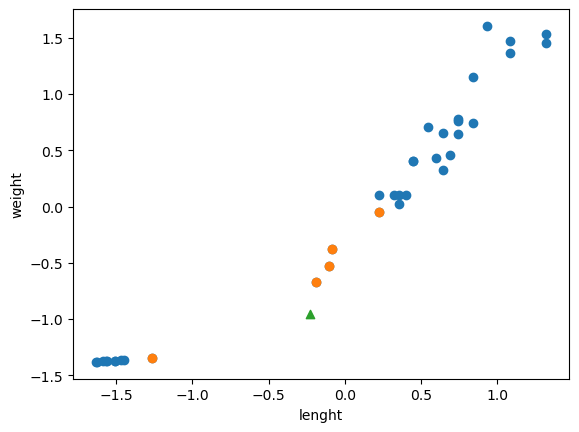

In [24]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1])
# plt.scatter(25,150, marker='^')
plt.scatter(new[0], new[1], marker='^')
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler() # fit transform - 표준점수 변환

In [27]:
ss.fit(fish_data)

StandardScaler()

In [28]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [30]:
kn.score(test_scaled, test_target)

1.0